# World Happiness Report 2024 Analysis

**What Really Makes People Happy?**
*Exploratory Data Analysis by Omar Gisseh* | December 2025

### Project Overview
Analyzed the 2024 World Happiness Report to answer:
- Which countries are happiest?
- What factors (GDP, social support, health, freedom) drive happiness?
- Is money the main driver, or something else?

### Key Findings
- Nordic countries dominate the top 10
- Social support and healthy life expectancy are stronger predictors than GDP alone
- Freedom to make life choices has a big impact
- Regional differences are stark (Western Europe high, Sub-Saharan Africa low)

### Tools Used
- Python
- Pandas for data manipulation
- Matplotlib for visualizations
- Linear Regression for predictive modeling

## 1. Data Loading and Overview

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Direct link to 2024 World Happiness Report CSV
url = "https://raw.githubusercontent.com/Escavine/World-Happiness/main/World-happiness-report-2024.csv"

df = pd.read_csv(url)

# Summary
print(df.head())
print(df.info())
print(df.columns.tolist())

  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of co

In [27]:
df.shape

(143, 12)

In [28]:
df.isna().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

## 2. Top 10 Happiest & Least Happy Countries

In [29]:
print("10 most happiest countries")
df.sort_values("Ladder score", ascending=False)[["Country name", "Ladder score"]].head(10)

10 most happiest countries


,Country name,Ladder score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525
3,Sweden,7.344
4,Israel,7.341
5,Netherlands,7.319
6,Norway,7.302
7,Luxembourg,7.122
8,Switzerland,7.060
9,Australia,7.057


In [30]:
print("10 least happiest countries")
df.sort_values("Ladder score")[["Country name", "Ladder score"]].head(10)

10 least happiest countries


,Country name,Ladder score
142,Afghanistan,1.721
141,Lebanon,2.707
140,Lesotho,3.186
139,Sierra Leone,3.245
138,Congo (Kinshasa),3.295
137,Zimbabwe,3.341
136,Botswana,3.383
135,Malawi,3.421
134,Eswatini,3.502
133,Zambia,3.502


##  3. My very own country, The Gambia

In [31]:
my_country = df[df["Country name"] == "Gambia"]
my_country

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
111,Gambia,Sub-Saharan Africa,4.485,4.625,4.344,0.75,0.684,0.33,0.459,0.324,0.048,1.89


## 4. Regional Happiness Comparison

In [32]:
#Exercise 2: Regional Happiness Comparison
df.groupby("Regional indicator")["Ladder score"].mean().sort_values(ascending=False)
"""Interpretation: North America and ANZ are the happiest. """

'Interpretation: North America and ANZ are the happiest. '

## 5. Factor Analysis: High vs Low Happiness Countries

In [33]:
# Exercise 3: Factor Correlation
avg_score = df["Ladder score"].mean()
df["High Happiness"] = df["Ladder score"] > avg_score

factors = ["Log GDP per capita", "Social support", "Healthy life expectancy",
           "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

df.groupby("High Happiness")[factors].mean()

,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
High Happiness,,,,,,
False,1.059639,0.847885,0.390033,0.517656,0.141426,0.114918
True,1.625253,1.355506,0.621924,0.700127,0.150013,0.184392


## 6. Visualizations

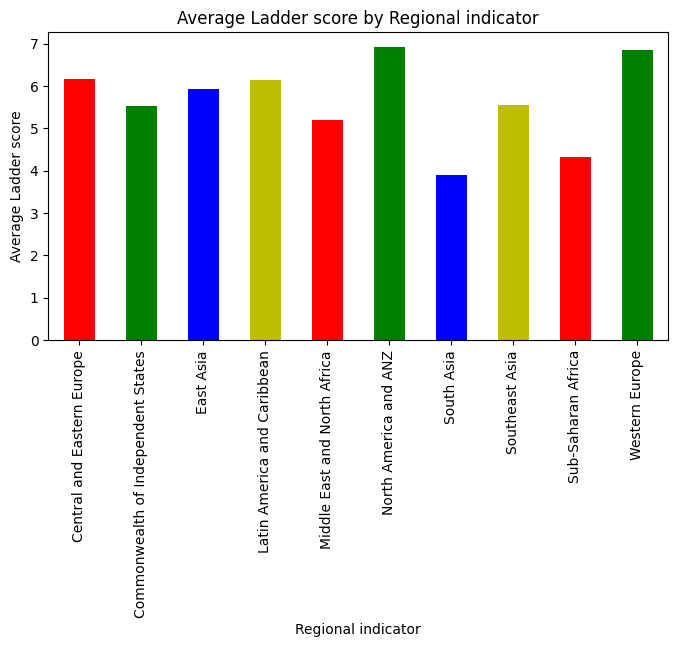

'Interpretation: It shows that North America and ANZ are the happiest on average followed by Western Europe. Sub-Saharan Africa is low compared to Western Europe probably due to level poverty, social support, health, perception of corruption etc. '

<Figure size 640x480 with 0 Axes>

In [34]:
#Exercise 4: Visualization – Happiness by Region Bar Chart
df.groupby("Regional indicator")["Ladder score"].mean().plot(kind = "bar", figsize = (8,4), color = ["r", "g", "b","y"])
plt.title("Average Ladder score by Regional indicator")
plt.xlabel("Regional indicator",)
plt.ylabel("Average Ladder score")
plt.show()
plt.savefig("happiness_by_region_bar_chart.png", dpi=300, bbox_inches='tight')

"""Interpretation: It shows that North America and ANZ are the happiest on average followed by Western Europe. Sub-Saharan Africa is low compared to Western Europe probably due to level poverty, social support, health, perception of corruption etc. """

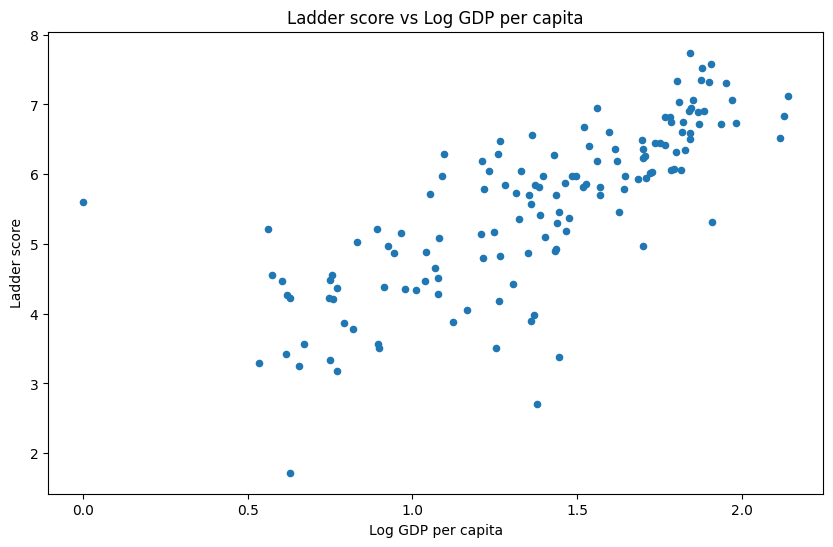

<Figure size 640x480 with 0 Axes>

In [35]:
#Exercise 5: Interpretation – Top Factors Scatter Plot
df.plot(kind = "scatter", y = "Ladder score", x = "Log GDP per capita", figsize = (10,6))
plt.title("Ladder score vs Log GDP per capita")
plt.show()
plt.savefig("Ladder_score_vs_log_gdp_per_capita.png", dpi=300, bbox_inches='tight')

## 7. Predictive Modeling (Linear Regression)

In [36]:
# Select only rows where Log GDP per capita is not missing
clean_df = df.dropna(subset=["Log GDP per capita", "Ladder score"])

# Prepare data
X = clean_df[["Log GDP per capita"]].values  # 2D array
y = clean_df["Ladder score"].values

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Predict
predictions = model.predict(X)

# Add predictions back
clean_df = clean_df.copy()
clean_df["Predicted Happiness"] = predictions

# Show comparison (top 10)
print(clean_df[["Country name", "Ladder score", "Predicted Happiness"]].head(10))
#Exercise 1: Explore Basic Stats

#Overall Ladder Score average
print(df["Ladder score"].mean())

#Top happiest countries
print(df.sort_values("Ladder score", ascending=False).head(5))


  Country name  Ladder score  Predicted Happiness
0      Finland         7.741             6.524307
1      Denmark         7.583             6.660978
2      Iceland         7.525             6.603320
3       Sweden         7.344             6.596913
4       Israel         7.341             6.436752
5  Netherlands         7.319             6.646030
6       Norway         7.302             6.754940
7   Luxembourg         7.122             7.158547
8  Switzerland         7.060             6.793378
9    Australia         7.057             6.545662
5.52758041958042
  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         

## 8. Model graph

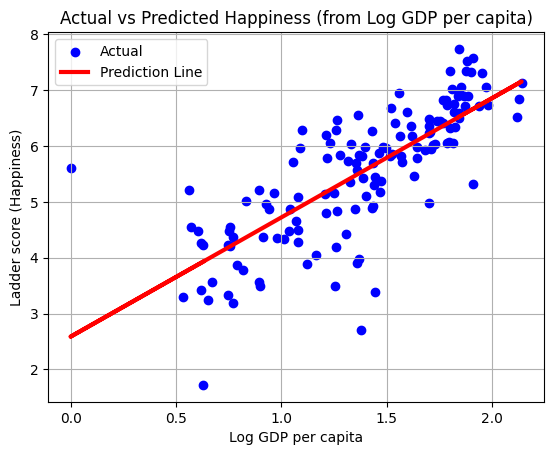

<Figure size 640x480 with 0 Axes>

In [37]:
# Plot
plt.scatter(clean_df["Log GDP per capita"], clean_df["Ladder score"], color="blue", label="Actual")
plt.plot(clean_df["Log GDP per capita"], clean_df["Predicted Happiness"], color="red", linewidth=3,
         label="Prediction Line")
plt.title("Actual vs Predicted Happiness (from Log GDP per capita)")
plt.xlabel("Log GDP per capita")
plt.ylabel("Ladder score (Happiness)")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("actual_vs_predicted_happiness.png", dpi=300, bbox_inches='tight')

## 9. Key Insights & Conclusions

## Key Insights

1. **Social relationships matter most** — countries with strong social support are consistently happier, even more than wealth alone predicts.
2. **Health and freedom** are critical — long healthy life and personal freedom boost happiness significantly.
3. **Money helps, but only to a point** — GDP has a strong effect in poorer countries, but diminishing returns in richer ones.
4. **Regional patterns** — Western Europe and North America lead; Sub-Saharan Africa and South Asia lag due to lower scores in health, support, and trust.

### Policy Implications
Governments aiming to increase national happiness should prioritize:
- Social safety nets
- Public health
- Personal freedoms
- Trust in institutions

More than just economic growth.